
# <span style="color:rgb(213,80,0)">Surgical Unit data.</span>

This file creates Figures 4.30-4.33.

## Beginning of code

In [1]:
close all;
clearvars;
load('hospitalFS.txt');
y=hospitalFS(:,5);
X=hospitalFS(:,1:4);

n=length(y);
prin=0;

## Prepare input for Figure 4.30

LMS using all subsamples (very lengthy)


In [2]:
computeLMSusingAllSubsets=false;
if computeLMSusingAllSubsets ==true
    nsamp=0;
    [outLXS]=LXS(y,X,'nsamp',nsamp);
else
    % best out of 111,469,176 subsets
    outLXS=struct;
    outLXS.bs= [ 3   11   20   23   74];
end

p=size(X,2)+1;

outFS=FSReda(y,X,outLXS.bs);

% Tranform minimum deletion residual from standard coordinates to normal
% coordinates
outFS1=FSRinvmdr(outFS,p);

## Create Figure 4.30


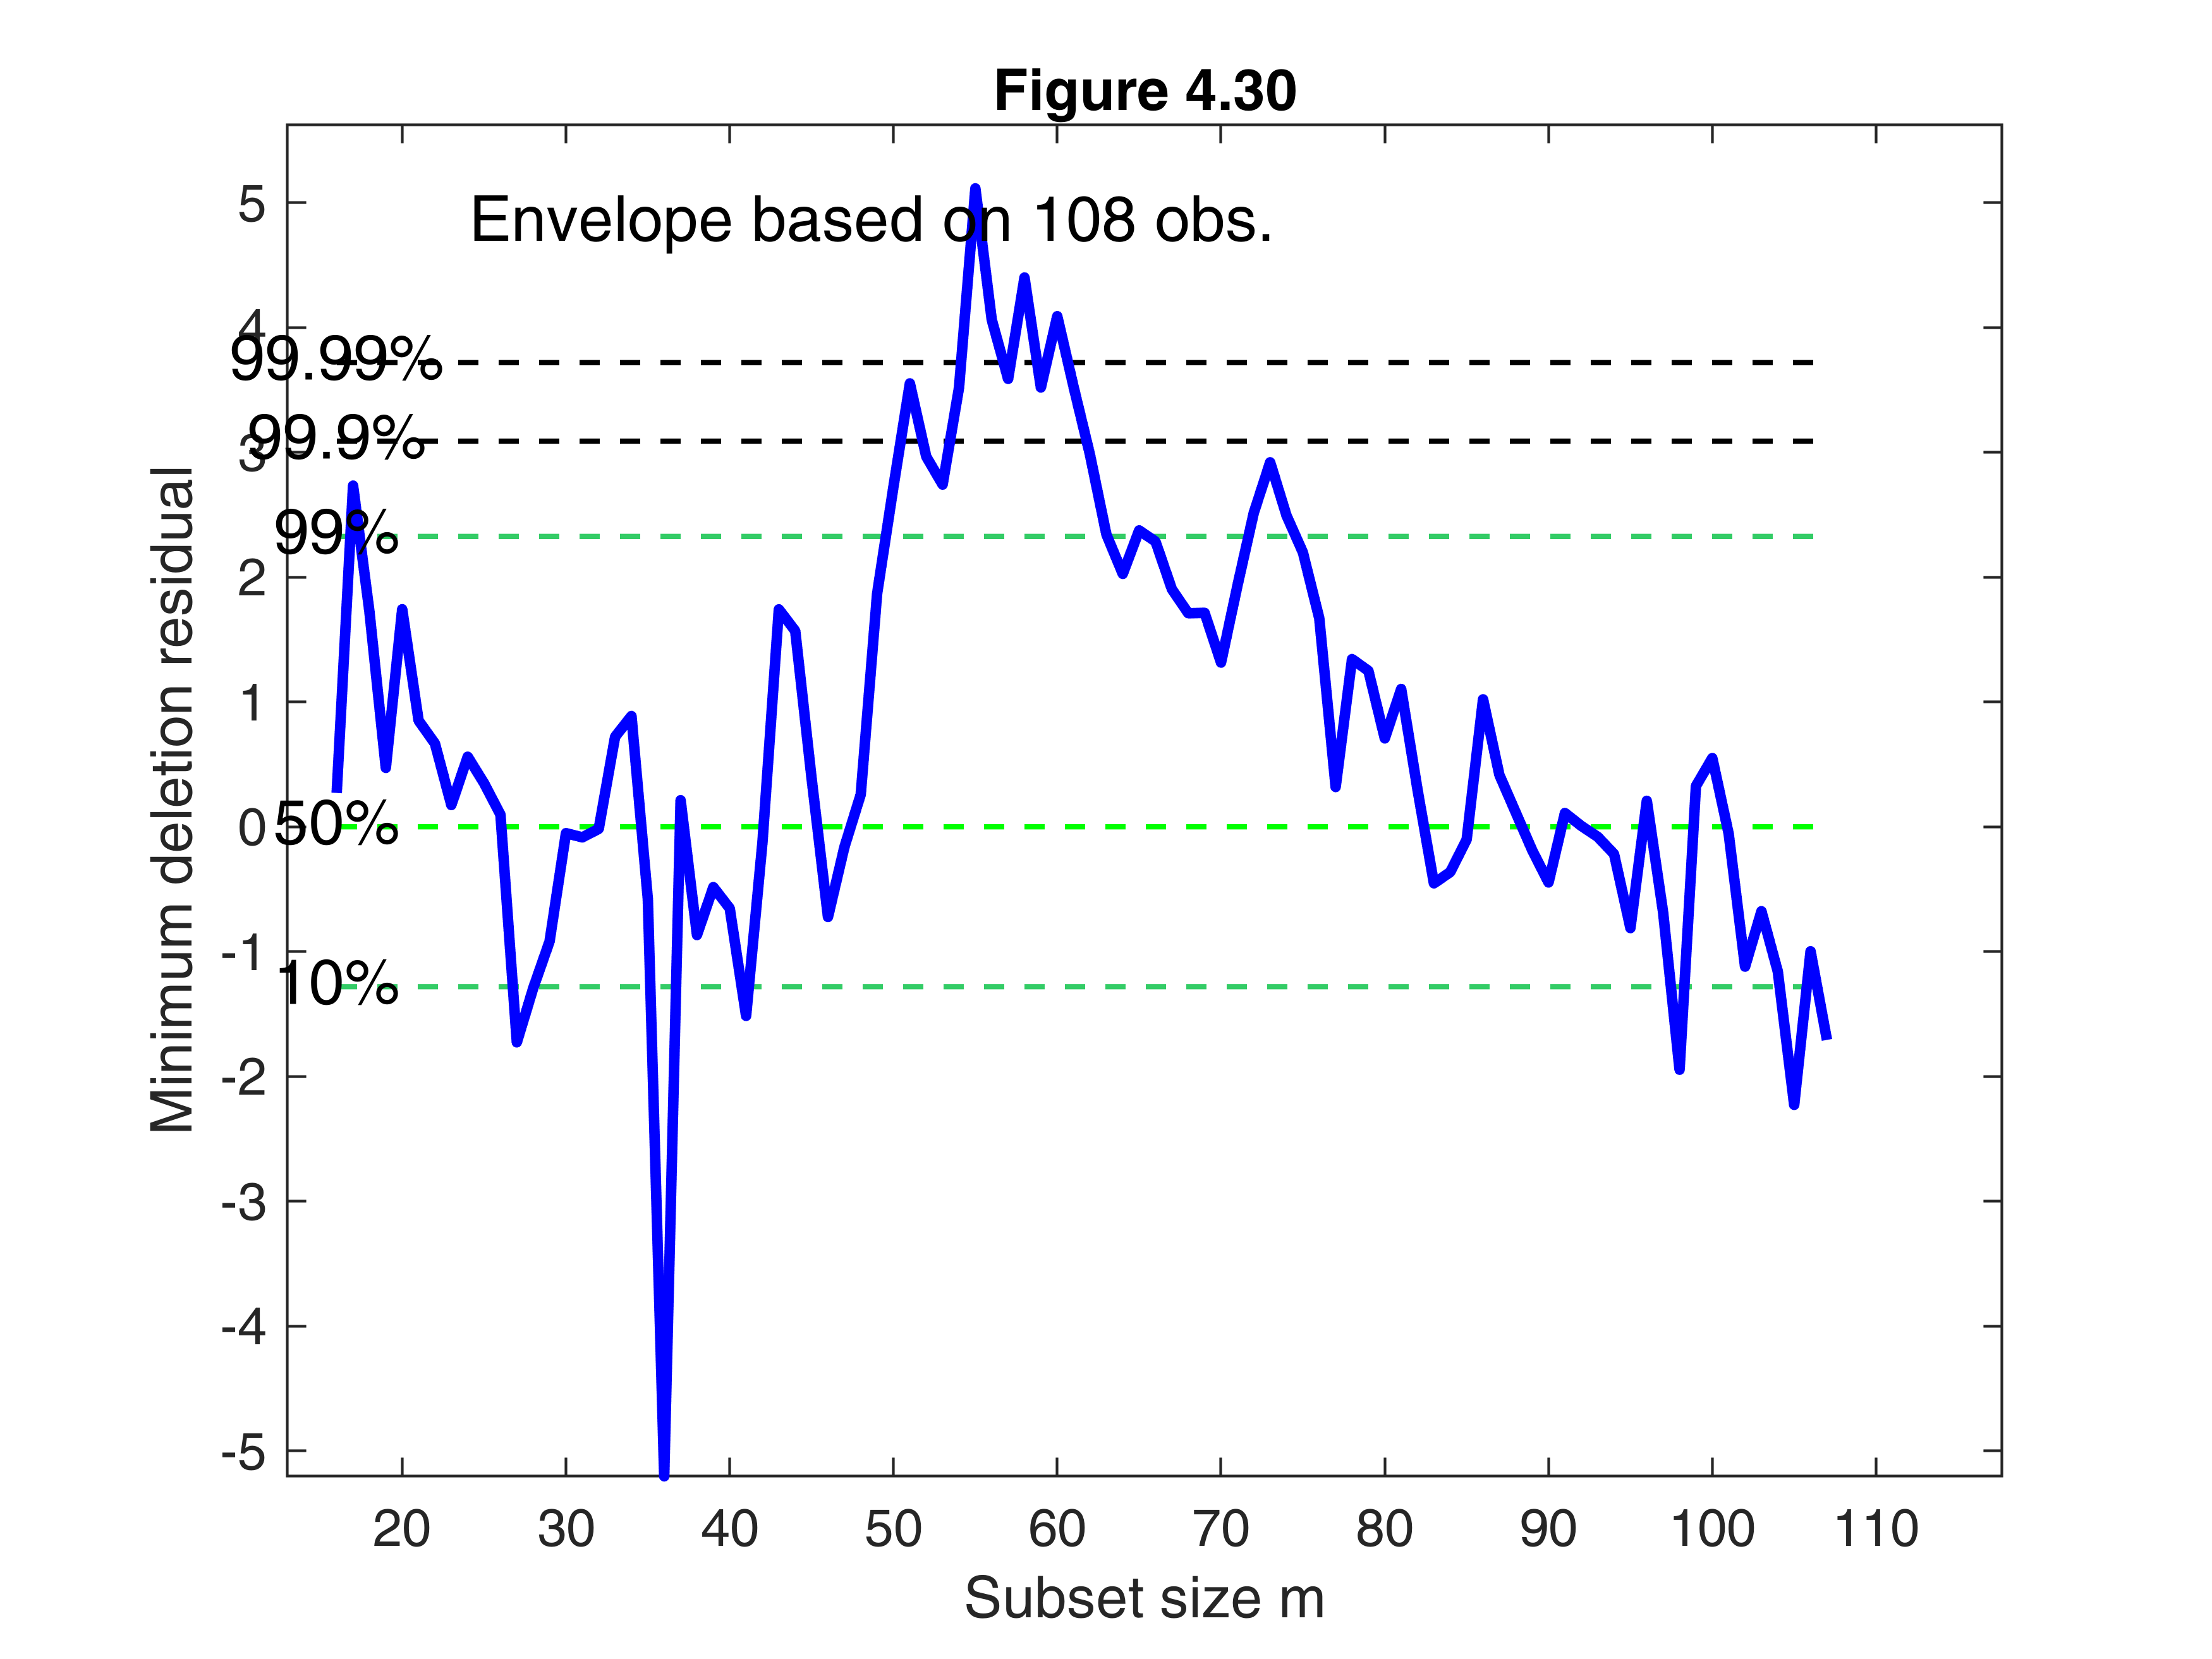

In [3]:
mdrplot(outFS1,'ncoord',true,'quant',[0.1 0.5 0.99 0.999 0.9999]);

if prin==1
    % print to postscript
    print -depsc SPmdrncoord.eps;
end

title('Figure 4.30')
set(gcf,"Name",'Figure 4.30')

## Create Figure

Automatic outlier detection


In [4]:
startJustSearchin1000Subsets=true;
if startJustSearchin1000Subsets ==true
    out=FSR(y,X,'plots',0);
else
    outLXS=struct;
    outLXS.bs= [ 3   11   20   23   74];
    [out]=FSR(y,X,'lms',outLXS.bs,'plots',0);
end

-------------------------
Signal detection loop
Sample seems homogeneous, no outlier has been found
Summary of the exceedances
           1          99         999        9999       99999
           1           3           1           0           0

In [5]:
disp(out)

         ListOut: NaN
        outliers: NaN
             mdr: [92x2 double]
              Un: [92x11 double]
            nout: [2x5 double]
            beta: [5x1 double]
           scale: 0.0587
    fittedvalues: [108x1 double]
       residuals: [108x1 double]
           class: 'FSR'

In [6]:
if prin==1
    % print to postscript
    print -depsc SPfsr.eps;
end

## Create Figure 4.31

SP data Monitoring of prop of units in bsb and tstat



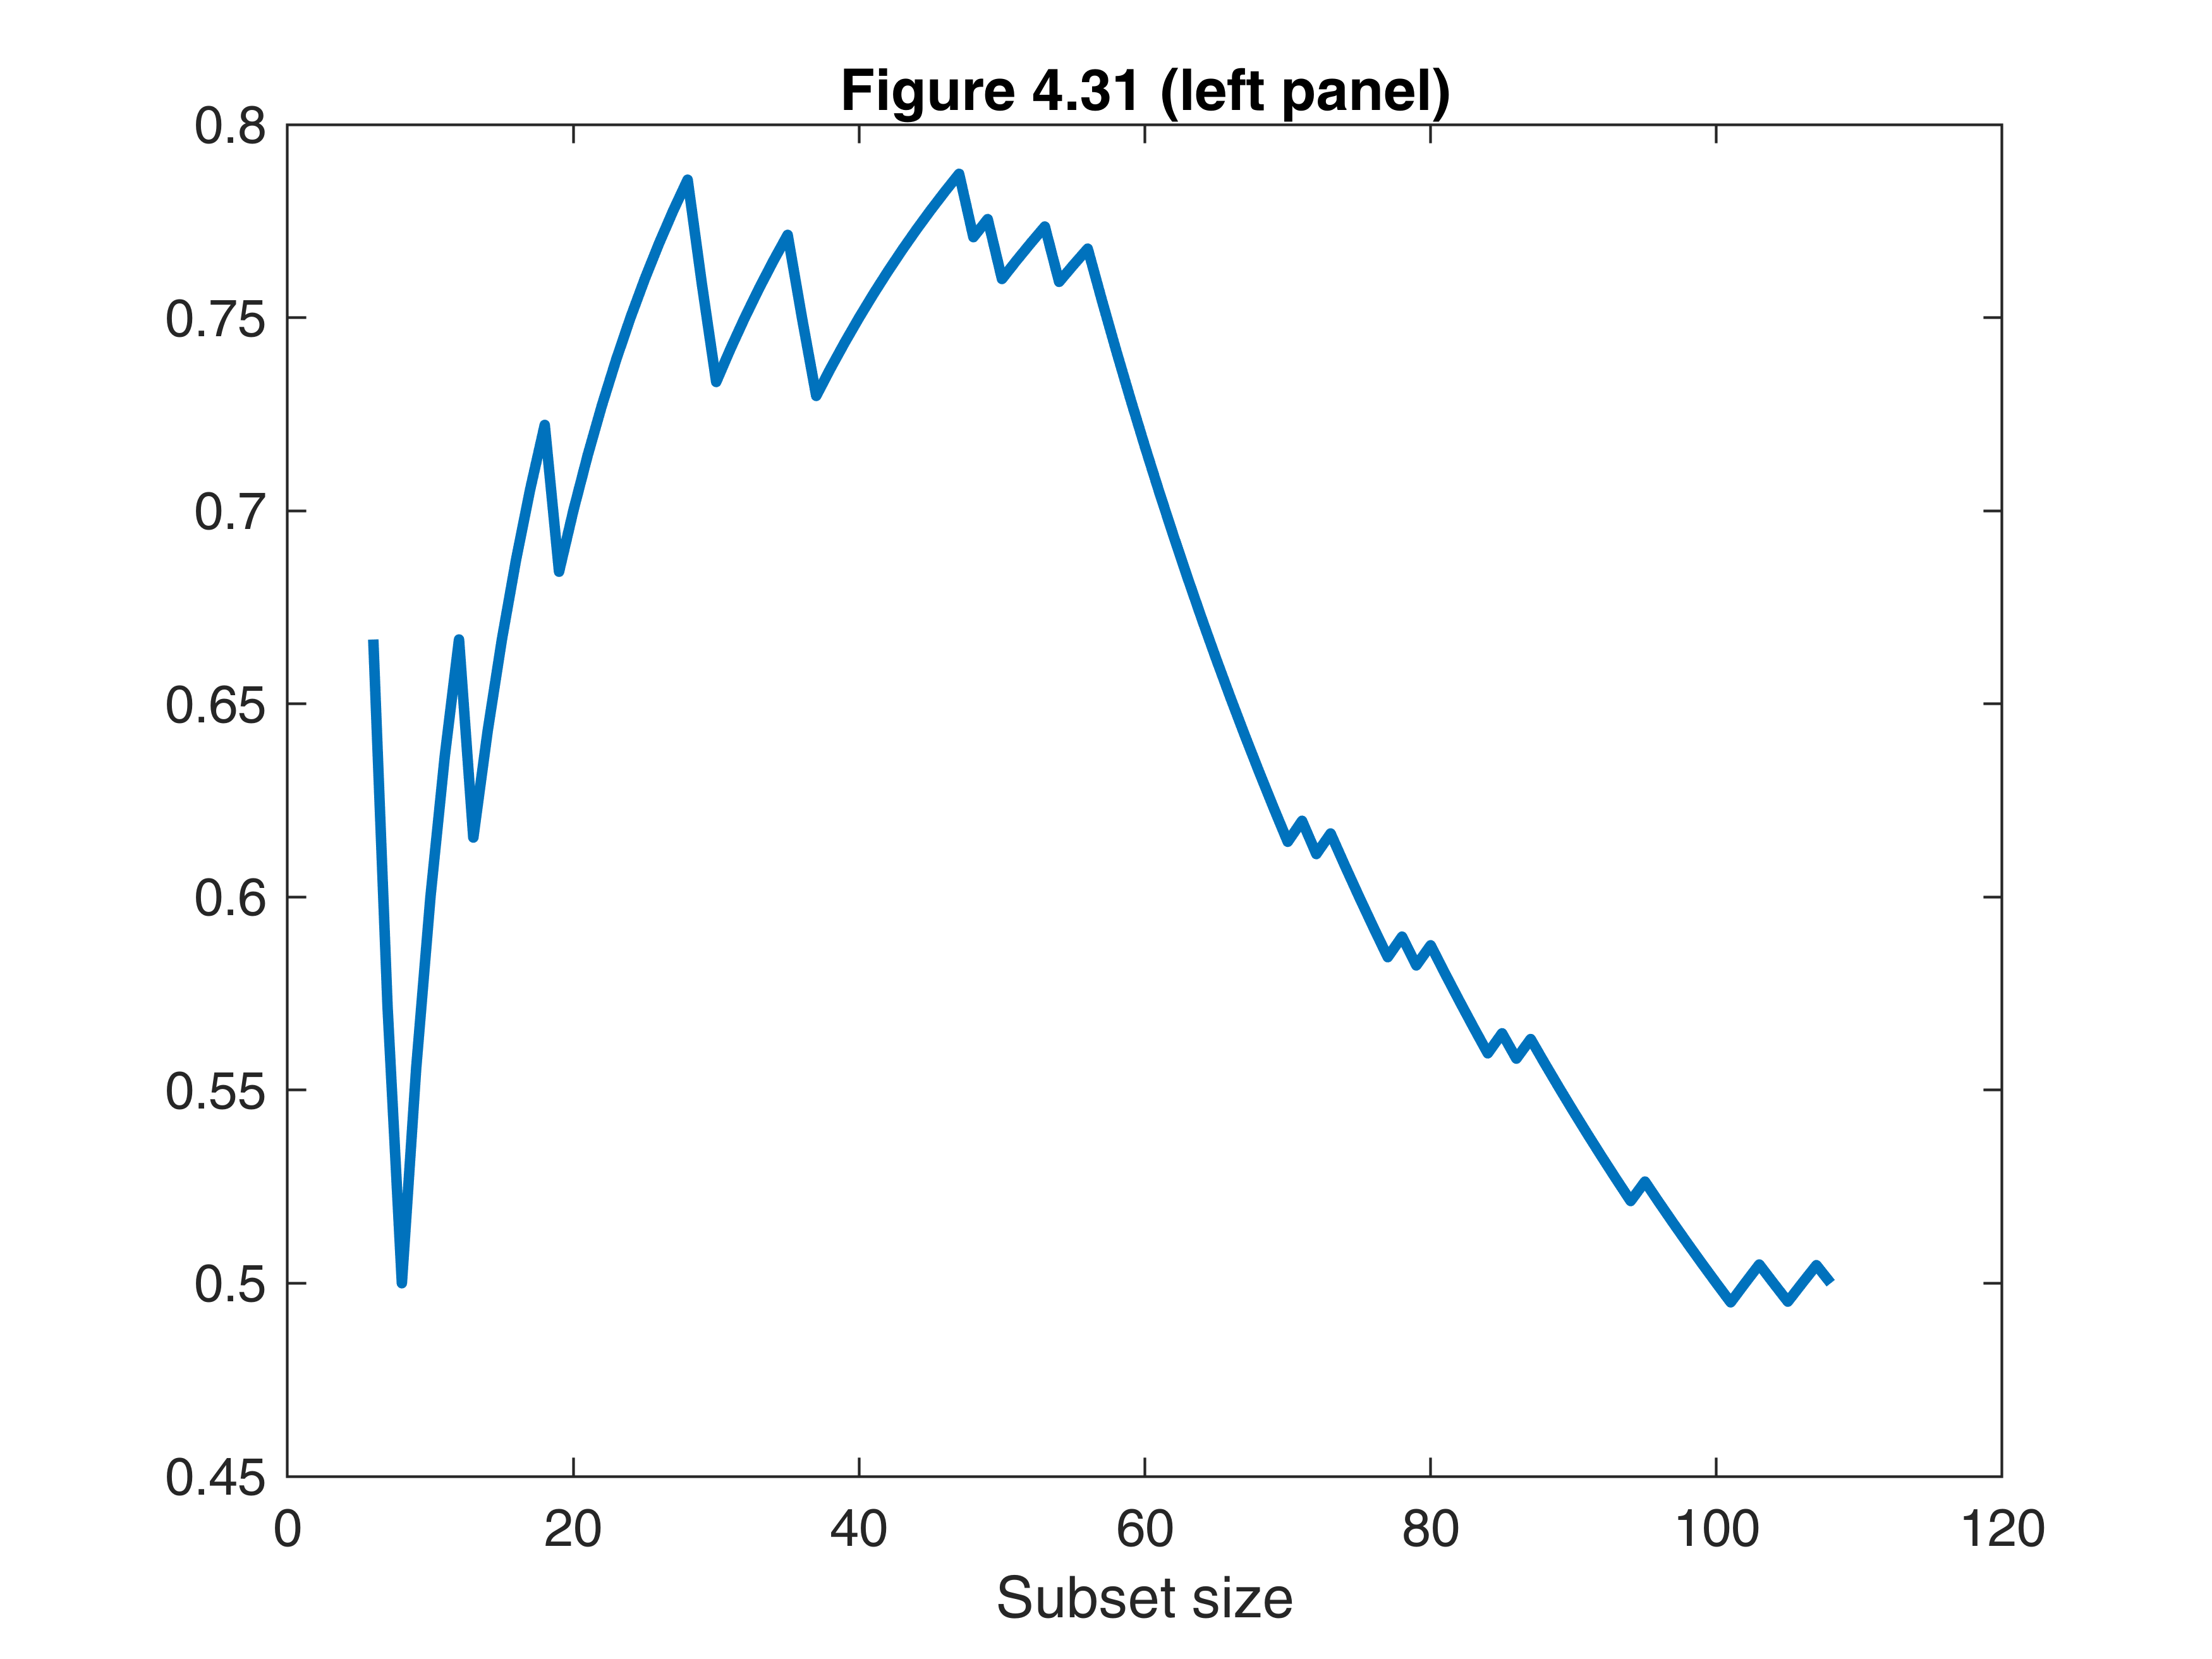

In [7]:
figure
nr=1;
nc=2;
Prop=[(p+1:n)' zeros(n-p,1)];
[Un,BB]=FSRbsb(y,X,outLXS.bs,'init',p+1,'bsbsteps',p+1:n);
for j=1:size(BB,2)
    bj=BB(:,j);
    bj=bj(~isnan(bj));
    Prop(j,2)=sum(bj<=54)/length(bj);
end

% subplot(nr,nc,1)
plot(Prop(:,1),Prop(:,2),'LineWidth',2)
xlabel('Subset size')

title('Figure 4.31 (left panel)')
set(gcf,"Name",'Figure 4.31 (left panel)')

## Create Figure 4.31 right panel

Forward Search



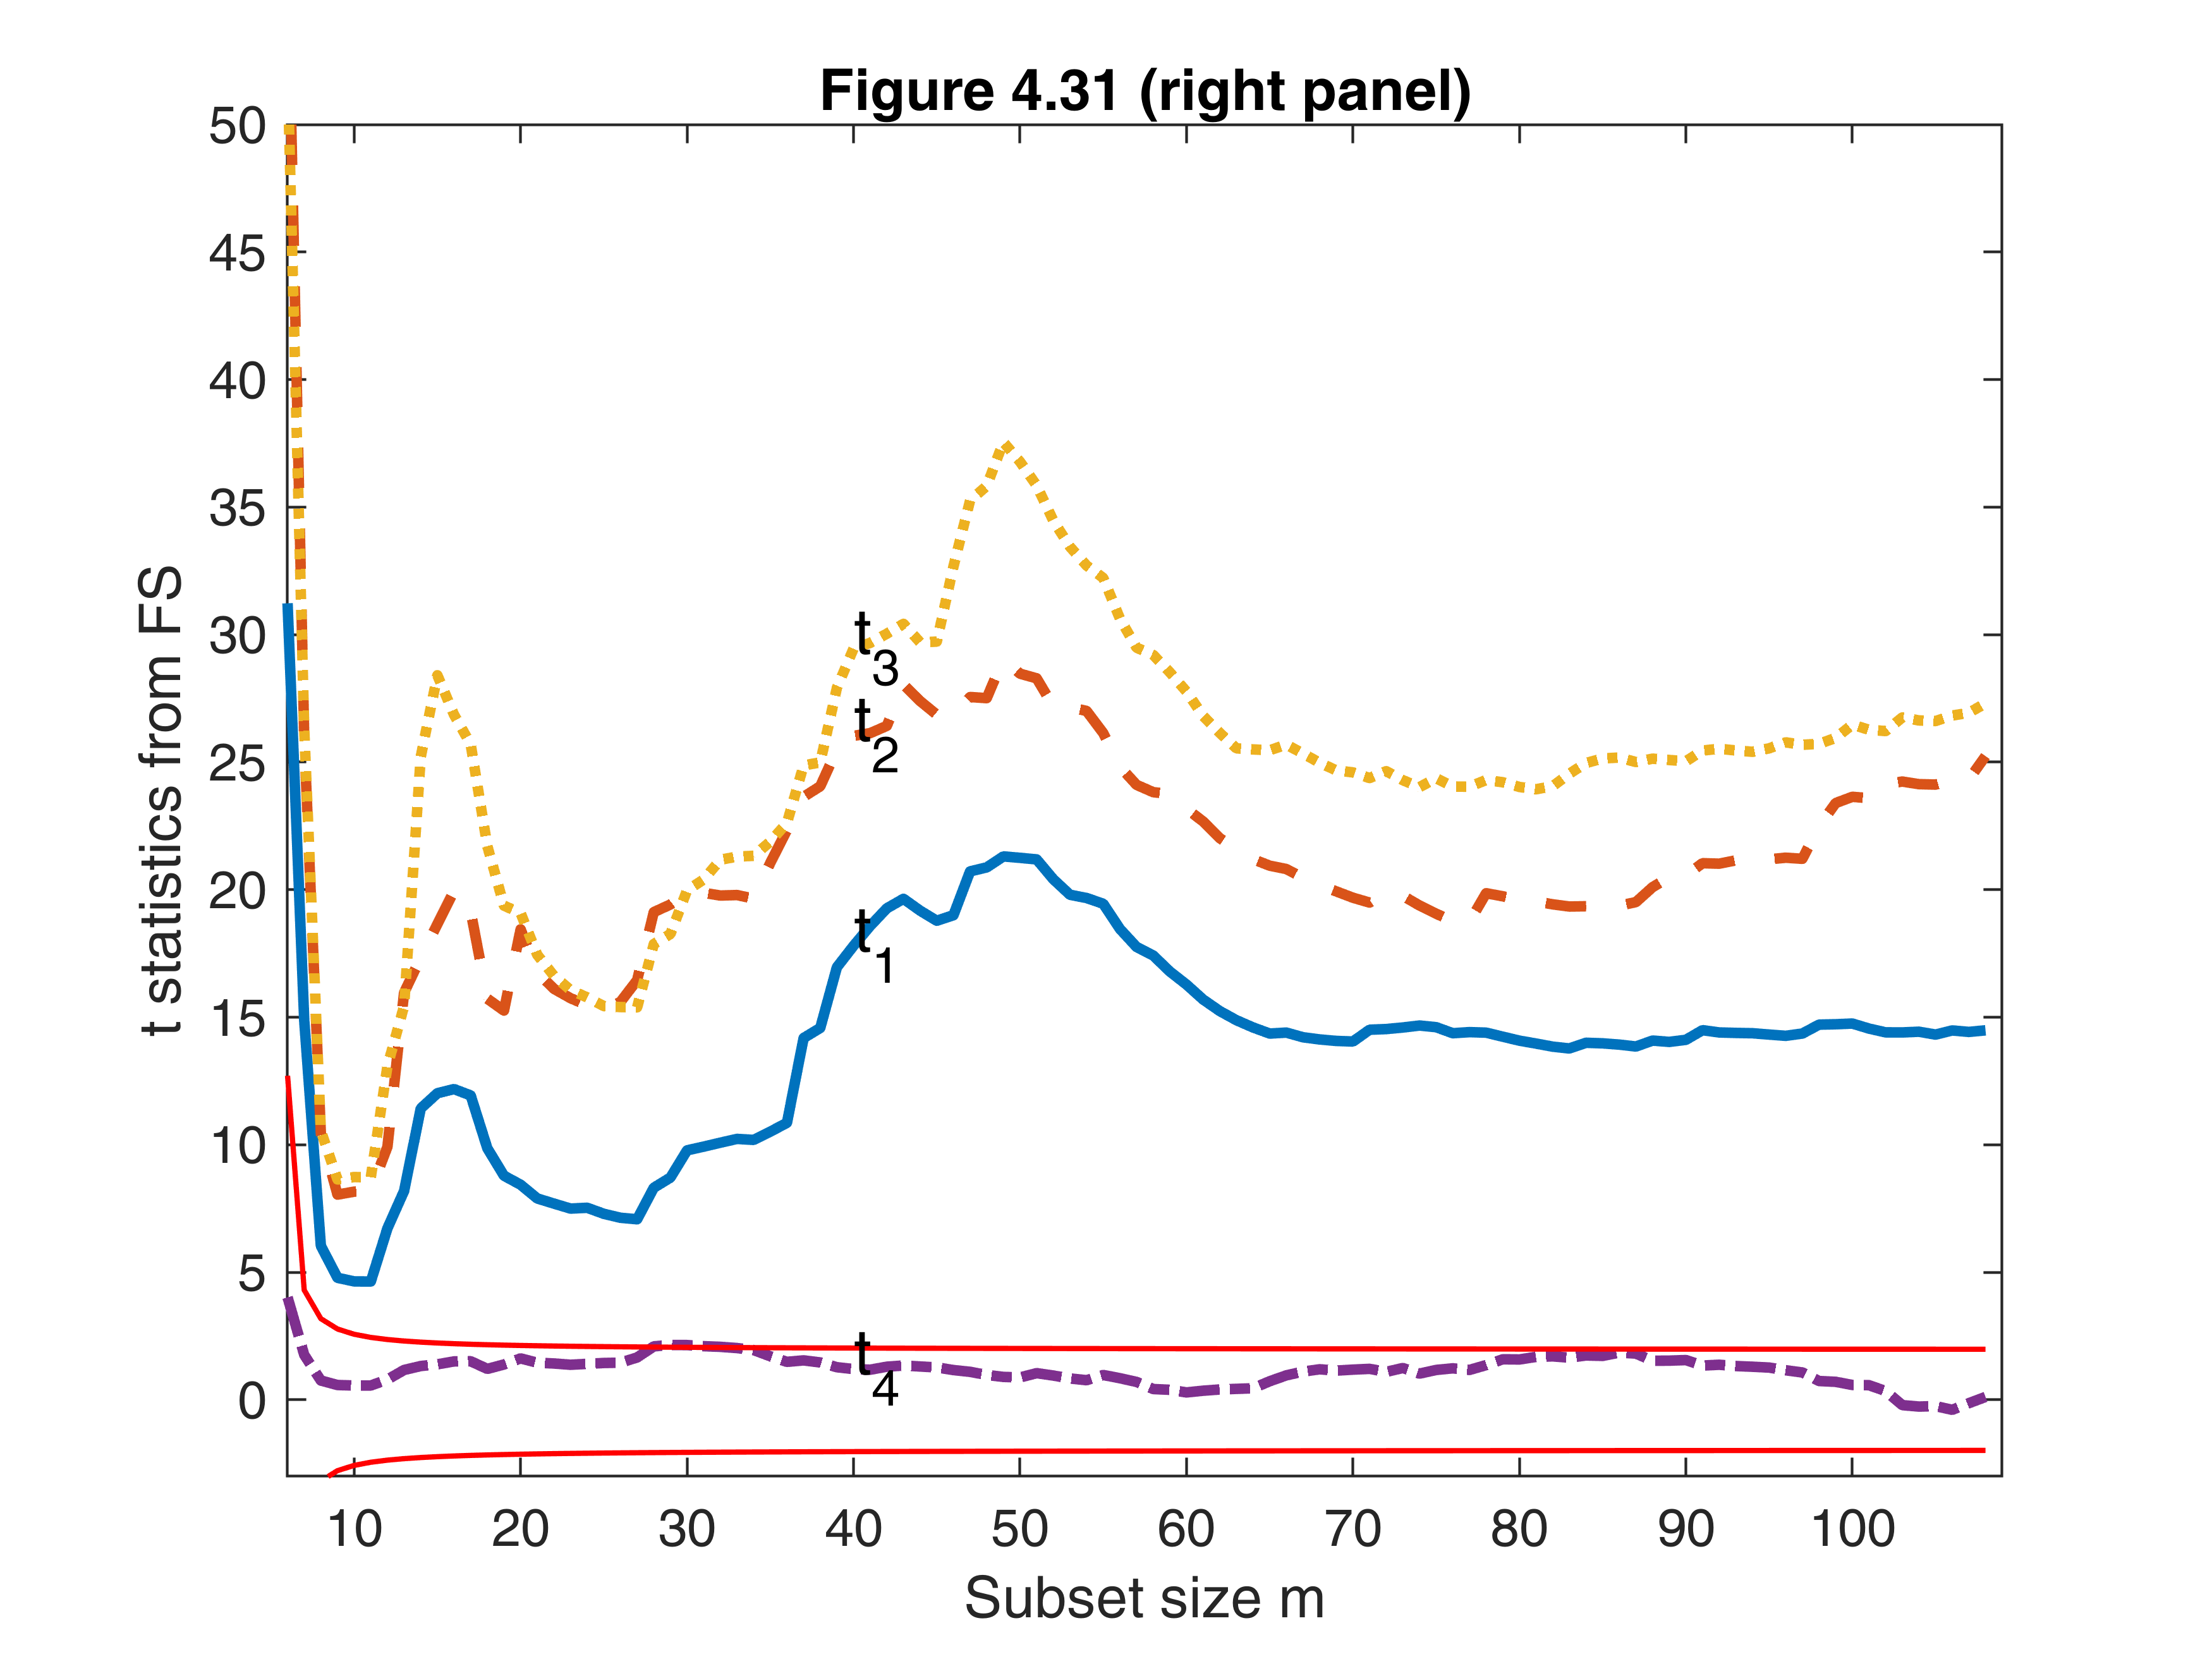

In [8]:
[outFS]=FSReda(y,X,outLXS.bs,'init',p+1);

fanplotFS(outFS,'conflev',0.95,'flabstep',40);

if prin==1
    % print to postscript
    print -depsc SPtmonitor.eps;
end
title('Figure 4.31 (right panel)')
set(gcf,"Name",'Figure 4.31 (right panel)')

## Create Figure 4.32 (with overlapping labels)

Forward Search Monitoring of traditional tstat



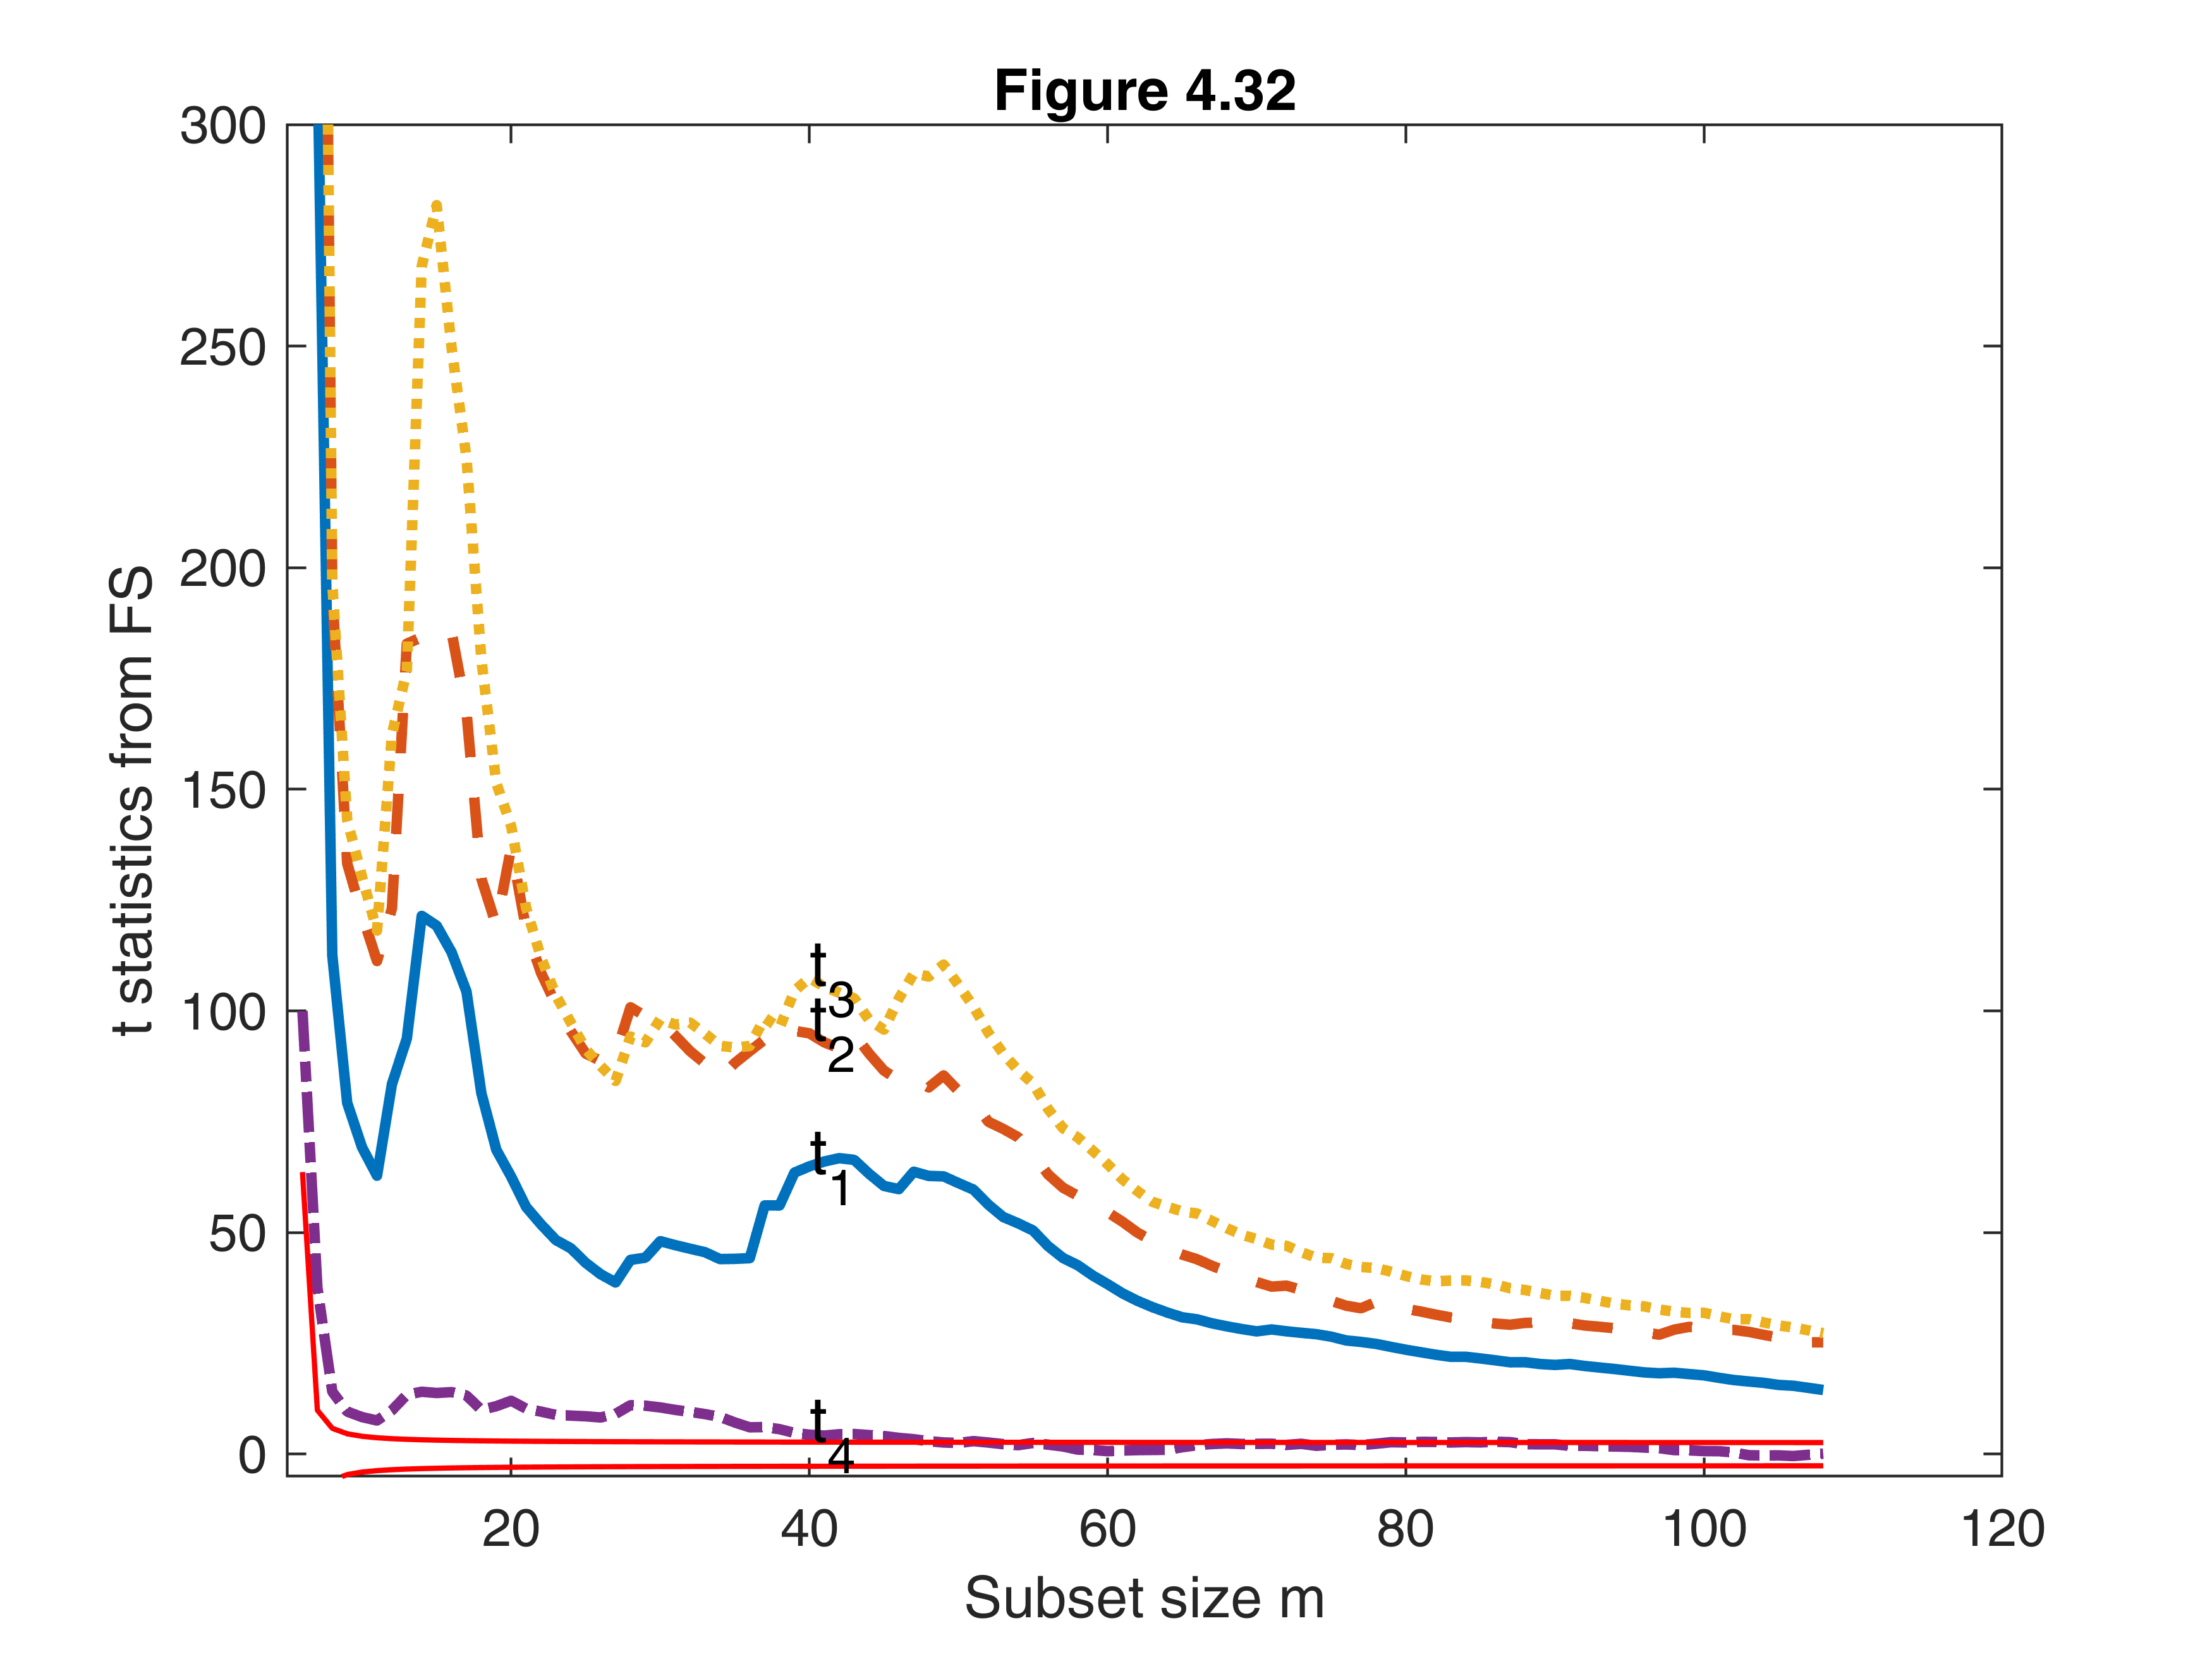

In [9]:
[outFS]=FSReda(y,X,outLXS.bs,'init',p+1,'tstat','trad');
fanplotFS(outFS,'ylimy',[-5 300],'tag','ploverl','xlimx',[5 120],'flabstep',40);

if prin==1
    % print to postscript
    print -depsc SPtmonitortrad.eps;
end
title('Figure 4.32')
set(gcf,"Name",'Figure 4.32')

## Create Figure 4.33

SP data Forward Search Monitoring of added tstat


In [10]:
figure
[out]=FSRaddt(y,X,'plots',1,'nameX',{'X1','X2','X3' 'X4'},'lwdenv',2,'lwdt',2);

Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.01 seconds


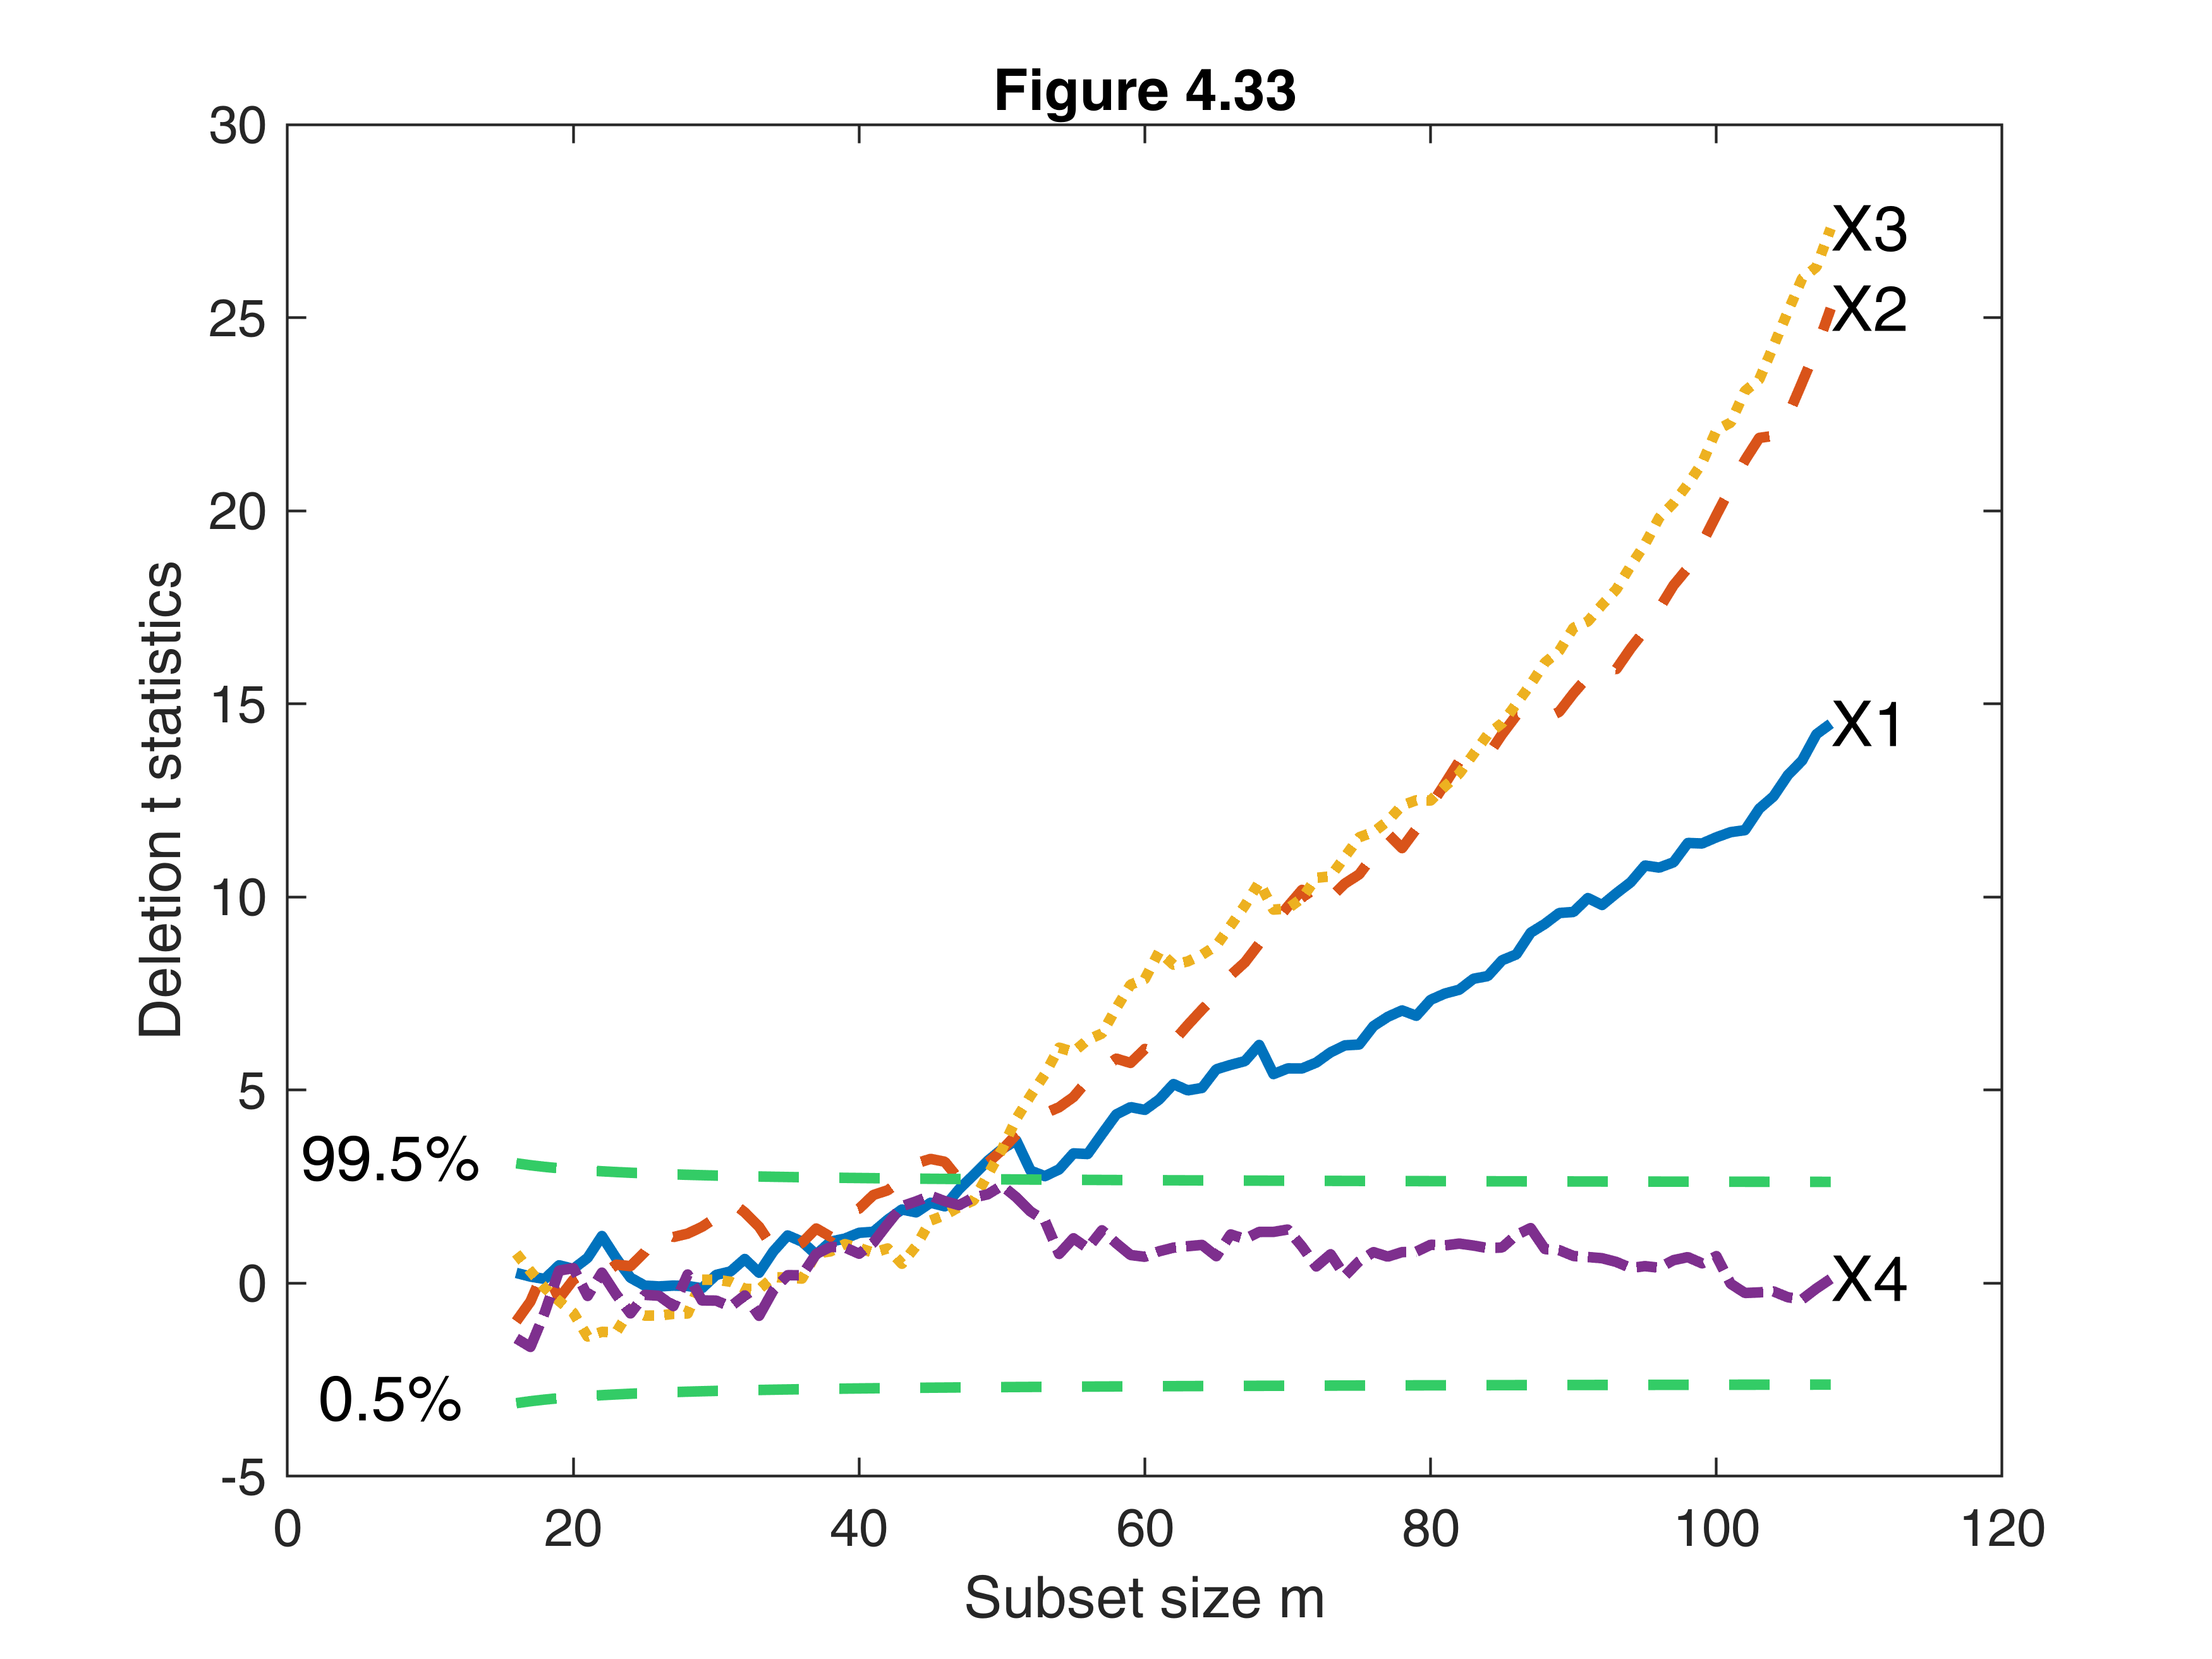

In [11]:
title('Figure 4.33')
set(gcf,"Name",'Figure 4.33')

In [12]:

if prin==1
    % print to postscript
    print -depsc SPtmonitoradd.eps;
end

%InsideREADME